In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive')

DATADIR ='gdrive/MyDrive/dataset'
CATEGORIES = ["with_mask", "without_mask"]



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


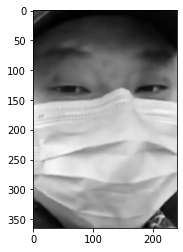

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

In [ ]:
print(img_array.shape)

(365, 241)


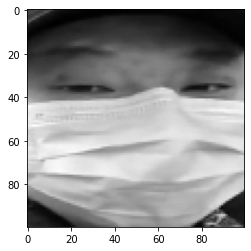

In [ ]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
data=[]
label =[]
def create_train_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      data.append(new_array)
      label.append(class_num)
create_train_data()


In [ ]:
print(len(data))

3833


In [ ]:
lb = LabelBinarizer()
label = lb.fit_transform(label)
label = to_categorical(label)

In [ ]:
data=np.array(data).reshape(-1,IMG_SIZE,IMG_SIZE,1)
label=np.array(label)

In [ ]:
(X_train, X_test, y_train, y_test)=train_test_split(data, label,test_size=0.20, stratify=label, random_state=10)

In [ ]:
X_train = X_train/255.0
model =Sequential()
model.add(Conv2D(200,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 3, 
                                        restore_best_weights = True)
  
output = model.fit(X_train, y_train, batch_size =32, 
                    epochs = 25,validation_split=0.1, 
                    callbacks =[earlystopping])

Epoch 1/25
87/87 [==============================] - 237s 3s/step - loss: 0.6118 - accuracy: 0.6955 - val_loss: 0.4595 - val_accuracy: 0.7818
Epoch 2/25
87/87 [==============================] - 237s 3s/step - loss: 0.4432 - accuracy: 0.7992 - val_loss: 0.4005 - val_accuracy: 0.8241
Epoch 3/25
87/87 [==============================] - 236s 3s/step - loss: 0.3607 - accuracy: 0.8499 - val_loss: 0.4021 - val_accuracy: 0.8274
Epoch 4/25
87/87 [==============================] - 235s 3s/step - loss: 0.2927 - accuracy: 0.8746 - val_loss: 0.3663 - val_accuracy: 0.8436
Epoch 5/25
87/87 [==============================] - 236s 3s/step - loss: 0.2930 - accuracy: 0.8818 - val_loss: 0.3385 - val_accuracy: 0.8567
Epoch 6/25
87/87 [==============================] - 234s 3s/step - loss: 0.2440 - accuracy: 0.9047 - val_loss: 0.3240 - val_accuracy: 0.8762
Epoch 7/25
87/87 [==============================] - 234s 3s/step - loss: 0.1957 - accuracy: 0.9195 - val_loss: 0.2482 - val_accuracy: 0.8893
Epoch 8/25
87

In [ ]:
result=output.history


In [37]:
epochs = np.arange(0,10)

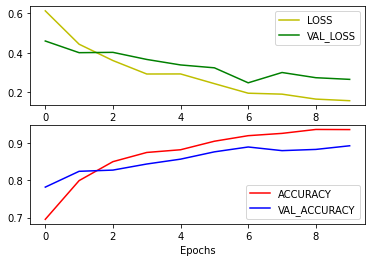

In [38]:
plt.figure(1)
plt.subplot(211)
plt.plot(epochs,result['loss'],c='y',label='LOSS')
plt.plot(epochs,result['val_loss'],c='g',label='VAL_LOSS')
plt.xlabel('Epochs')
plt.legend()
plt.subplot(212)
plt.plot(epochs,result['accuracy'],c='r',label='ACCURACY')
plt.plot(epochs,result['val_accuracy'],c='b',label='VAL_ACCURACY')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)

24/24 [==============================] - 17s 694ms/step - loss: 150.3865 - accuracy: 0.7666


In [42]:
checkpoint_path = '/content/drive/MyDrive/saved_model'
model.save(checkpoint_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_model/assets


In [45]:
model2 = keras.models.load_model('/content/drive/MyDrive/saved_model/')

In [46]:
loss, acc = model2.evaluate(X_test,y_test)

24/24 [==============================] - 17s 706ms/step - loss: 150.3865 - accuracy: 0.7666


In [117]:
predicted_labels=model.predict(X_test)
print(predicted_labels[300])

print(CATEGORIES[np.argmax(predicted_labels[300])])

[1. 0.]
with_mask


In [118]:
img=X_test[300]


In [119]:
img.shape
img = np.expand_dims(img,0)
img.shape

(1, 100, 100, 1)

In [120]:
p1 = model.predict(img)

In [121]:
p1

array([[1., 0.]], dtype=float32)

In [122]:
CATEGORIES[np.argmax(p1)]

'with_mask'

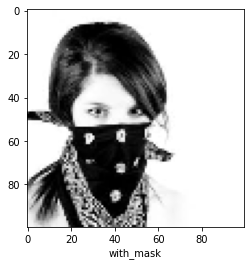

In [125]:
image = X_test[300]
plt.figure()
plt.imshow(image[:,:,0],cmap='gray')
plt.xlabel(CATEGORIES[np.argmax(y_test[300])])
plt.show()